In [1]:
import fly_plot_lib.plot as fpl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import figurefirst as fifi
# from statsmodels.stats import proportions_ztest

2.2.4
recommended version: 1.1.1 or greater


# Quick data load and some small slicing

In [2]:
#No wind
dfn=pd.read_csv('../trimmed_data/main/Orco_CsChrimson_still_air_merged.csv')
#Laminar Wind
dfl=pd.read_csv('../trimmed_data/main/OrcoCsChrimson_laminar_wind_merged.csv')

# Function that sets the origin of a trajectory to the end point of the optogenetic pulse or in the case of shams simply 675ms after the triggering event

In [7]:
df_catcher_l= []
for i in dfn['obj_id_unique'].unique():
    d_ =dfn[dfn['obj_id_unique']==i]
    d_=d_[d_['time stamp'].between(-200, 6000)]
    try:
        ind = np.where(d_['time stamp']==680)[0][0]
        ind0 =np.where(d_['time stamp']==0)[0][0]
        #if d_['xvel'].iloc[ind0]<0:
        #    d_['x']=d_['x']*-1
        x_ref =d_['x'].iloc[ind]
        y_ref = d_['y'].iloc[ind]
        d_['norm x']=d_['x']-x_ref
        d_['norm y']=d_['y']-y_ref
        df_catcher_l.append(d_)
    except:
        pass

In [8]:
df_catcher_= []
for i in dfl['obj_id_unique'].unique():
    d_ =dfl[dfl['obj_id_unique']==i]
    d_=d_[d_['time stamp'].between(-200, 5000)]
    try:
        ind = np.where(d_['time stamp']==680)[0][0]
        ind0 =np.where(d_['time stamp']==0)[0][0]
        #if d_['xvel'].iloc[ind0]<0:
        #    d_['x']=d_['x']*-1
        x_ref =d_['x'].iloc[ind]
        y_ref = d_['y'].iloc[ind]
        d_['norm x']=d_['x']-x_ref
        d_['norm y']=d_['y']-y_ref
        df_catcher_.append(d_)
    except:
        pass

In [9]:
dfn =pd.concat(df_catcher_l)
dfl=pd.concat(df_catcher_)

# horizontal distance from odor loss point

In [11]:
dfn['distance from center']=(dfn['norm x']**2 +dfn['norm y']**2)**0.5
dfl['distance from center']=(dfl['norm x']**2 +dfl['norm y']**2)**0.5

In [12]:
dfn100=dfn[dfn['duration']==100]
dfn0=dfn[dfn['duration']==0]
dfl100=dfl[dfl['duration']==100]
dfl0=dfl[dfl['duration']==0]

In [18]:
def slice_means(df, index):
    time_vec=[]
    mean_vec=[]
    upper_vec =[]
    lower_vec =[]
    for i in df['time stamp'].unique():
        if i >-100 and i <5000:
            dummy_df =df[df['time stamp']==i]
            #helps remove edge errors with calibration not working near walls as accurately
            dummy_df=dummy_df[dummy_df['x'].between(-.5, .5)]
            dummy_df=dummy_df[dummy_df['y'].between(-.25, .25)]
            time_vec.append(i)
            mean = dummy_df[index].mean()
            upper= dummy_df[index].mean() + dummy_df[index].sem()*1.96
            lower= dummy_df[index].mean() - dummy_df[index].sem()*1.96
            mean_vec.append(mean)
            upper_vec.append(upper)
            lower_vec.append(lower)
    return time_vec, mean_vec, upper_vec, lower_vec




# FiFI setup

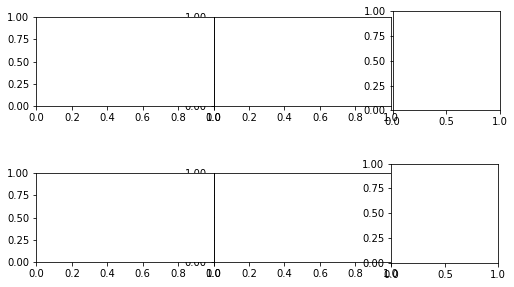

In [3]:
template = '../figure_first_templates/f5.svg'
layout =fifi.svg_to_axes.FigureLayout(template, autogenlayers=True, make_mplfigures=True, hide_layers=[])
fs=8
lw=1

# Mean response plots

In [96]:
ax=layout.axes[('proxim', 'flash_summary')]

In [97]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfn100, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfl100, 'distance from center')

In [98]:
ax.plot(d50_time, d50_mean, color = 'red',linestyle='--', linewidth =lw, label ="Laminar Wind")

ax.plot(d0_time, d0_mean, color ='red', linestyle = '-', linewidth = lw, label ="No Wind")

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'red', alpha = 0.1, lw =0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'red', alpha = 0.1, lw = 0)


ax.axvspan(0, 675, color = 'red', alpha = 0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Flashes")

ax.set_xlim(-100, 3000)
ax.set_ylim(0, .3)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

In [99]:
ax=layout.axes[('proxim', 'sham_summary')]

In [100]:
d0_time, d0_mean, d0_upper, d0_lower = slice_means(dfn0, 'distance from center')
d50_time, d50_mean, d50_upper, d50_lower = slice_means(dfl0, 'distance from center')


In [102]:
ax.plot(d50_time, d50_mean, color = 'k',linestyle='--', linewidth =lw)

ax.plot(d0_time, d0_mean, color ='k', linewidth = lw)

ax.fill_between(d50_time, d50_upper, d50_lower, color = 'k', alpha = 0.1, lw = 0)

ax.fill_between(d0_time, d0_upper, d0_lower, color = 'k', alpha = 0.1, lw =0)

ax.axvspan(0, 675, color = 'gray', alpha = 0.1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Horizontal Distance from\n End Position (m)")
ax.set_title("Shams")
#ax.set_xticks([0, 500, 1000, 1500, 2000])

ax.set_ylim(0, .3)
ax.set_xlim(-100, 3000)

fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], yticks=[0, .3], xticks=[0, 675, 3000], tick_length=3, linewidth=.75)
fifi.mpl_functions.set_fontsize(ax, fs)

# Void Plots

In [103]:
ax=layout.axes[('proxim', 'void_nw_f')]

In [104]:
dfn100_void = dfn100[dfn100['time stamp'].between(680, 5000)]

In [105]:
a = np.arange(-1.,1.,.0025)
b = np.linspace(-.5, .5, 500)
x = np.arange(-1.,1.0025, .0025)
y = np.linspace(-.5, .5, 501)
bin_values,_,__ = np.histogram2d(dfn100_void['norm x'], dfn100_void['norm y'],  bins =(x, y))
#print(bin_values)
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
#print(newdf)
sumz = newdf.sum(axis=0)
#print(sumz)
ax.set_title("No Wind: Flash")
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(dfn100_void)
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.00012, cmap='bone_r', shading='flat', rasterized=True)
fifi.mpl_functions.adjust_spines(ax, [])
fifi.mpl_functions.set_fontsize(ax, fs)

In [107]:
ax=layout.axes[('proxim', 'void_lw_f')]

In [108]:
dfl100_void = dfl100[dfl100['time stamp'].between(680, 5000)]

In [109]:
a = np.arange(-1.,1,.0025)
b = np.linspace(-.5, .5, 500)
x = np.arange(-1.,1.0025, .0025)
y = np.linspace(-.5, .5, 501)
bin_values,_,__ = np.histogram2d(dfl100_void['norm x'], dfl100_void['norm y'],  bins =(x, y))
#print(bin_values)
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
#print(newdf)
sumz = newdf.sum(axis=0)
#print(sumz)
ax.set_title("Laminar Wind: Flash")
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(dfl100_void)
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.00012, cmap='bone_r', shading='flat', rasterized=True)
fifi.mpl_functions.adjust_spines(ax, [])
fifi.mpl_functions.set_fontsize(ax, fs)

In [111]:
ax=layout.axes[('proxim', 'void_nw_s')]

In [112]:
dfn0_void=dfn0[dfn0['time stamp'].between(680, 5000)]

In [113]:
a = np.arange(-1.,1.,.0025)
b = np.linspace(-.5, .5, 500)
x = np.arange(-1.,1.0025, .0025)
y = np.linspace(-.5, .5, 501)
bin_values,_,__ = np.histogram2d(dfn0_void['norm x'], dfn0_void['norm y'],  bins =(x, y))
#print(bin_values)
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
#print(newdf)
sumz = newdf.sum(axis=0)
#print(sumz)
ax.set_title("No Wind: Sham")
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(dfn0)
X,Y = np.meshgrid(x,y)
# Plot the heatmap
#ax.set_xlabel('20 cm')
ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.00012, cmap='bone_r', shading='flat', rasterized=True)
fifi.mpl_functions.adjust_spines(ax, [])
fifi.mpl_functions.set_fontsize(ax, fs)

In [115]:
ax=layout.axes[('proxim', 'void_lw_s')]

In [116]:
dfl0_void =dfl0[dfl0['time stamp'].between(680, 5000)]

In [117]:
a = np.arange(-1.,1.,.0025)
b = np.linspace(-.5, .5, 500)
x = np.arange(-1,1.0025, .0025)
y = np.linspace(-.5, .5, 501)
bin_values,_,__ = np.histogram2d(dfl0_void['norm x'], dfl0_void['norm y'],  bins =(x, y))
#print(bin_values)
newdf = pd.DataFrame(bin_values.T, columns=a, index=b)
#print(newdf)
sumz = newdf.sum(axis=0)
#print(sumz)
ax.set_title("Laminar Wind: Sham")
newdf_normed= newdf
for i in range(0,len(sumz)):
    newdf_normed.iloc[:,i] = newdf.iloc[:,i]/len(dfl0_void)
X,Y = np.meshgrid(x,y)
# Plot the heatmap
ax.pcolormesh(X, Y, newdf_normed, vmin=0, vmax=0.00012, cmap='bone_r', shading='flat', rasterized=True)
fifi.mpl_functions.adjust_spines(ax, [])
fifi.mpl_functions.set_fontsize(ax, fs)

# Figure First saving function


In [119]:
layout.append_figure_to_layer(layout.figures['proxim'], 'proxim', cleartarget=True)
layout.write_svg(template)